In [2]:
import pandas as pd
import json
from sqlalchemy import create_engine
import psycopg2

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

In [29]:
#standard(stats)
stats = ["player","nationality","position","team","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 
#goalkeeping(keepers)
keepers = ["player","nationality","position","team","age","birth_year","gk_games","gk_games_starts","gk_minutes","gk_goals_against","gk_goals_against_per90","gk_shots_on_target_against","gk_saves","gk_save_pct","gk_wins","gk_ties","gk_losses","gk_clean_sheets","gk_clean_sheets_pct","gk_pens_att","gk_pens_allowed","gk_pens_saved","gk_pens_missed"]
keepers3 = ["players_used","gk_games","gk_games_starts","gk_minutes","gk_goals_against","gk_goals_against_per90","gk_shots_on_target_against","gk_saves","gk_save_pct","gk_wins","gk_ties","gk_losses","gk_clean_sheets","gk_clean_sheets_pct","gk_pens_att","gk_pens_allowed","gk_pens_saved","gk_pens_missed"]
#advance goalkeeping(keepersadv)
keepersadv = ["player","nationality","position","team","age","birth_year","minutes_90s","gk_goals_against","gk_pens_allowed","gk_free_kick_goals_against","gk_corner_kick_goals_against","gk_own_goals_against","gk_psxg","gk_psnpxg_per_shot_on_target_against","gk_psxg_net","gk_psxg_net_per90","gk_passes_completed_launched","gk_passes_launched","gk_passes_pct_launched","gk_passes","gk_passes_throws","gk_pct_passes_launched","gk_passes_length_avg","gk_goal_kicks","gk_pct_goal_kicks_launched","gk_goal_kick_length_avg","gk_crosses","gk_crosses_stopped","gk_crosses_stopped_pct","gk_def_actions_outside_pen_area","gk_def_actions_outside_pen_area_per90","gk_avg_distance_def_actions"]
keepersadv2 = ["minutes_90s","gk_goals_against","gk_pens_allowed","gk_free_kick_goals_against","gk_corner_kick_goals_against","gk_own_goals_against","gk_psxg","gk_psnpxg_per_shot_on_target_against","gk_psxg_net","gk_psxg_net_per90","gk_passes_completed_launched","gk_passes_launched","gk_passes_pct_launched","gk_passes","gk_passes_throws","gk_pct_passes_launched","gk_passes_length_avg","gk_goal_kicks","gk_pct_goal_kicks_launched","gk_goal_kick_length_avg","gk_crosses","gk_crosses_stopped","gk_crosses_stopped_pct","gk_def_actions_outside_pen_area","gk_def_actions_outside_pen_area_per90","gk_avg_distance_def_actions"]
#shooting(shooting)
shooting = ["player","nationality","position","team","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
#passing(passing)
passing = ["player","nationality","position","team","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
#passtypes(passing_types)
passing_types = ["player","nationality","position","team","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
#goal and shot creation(gca)
gca = ["player","nationality","position","team","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_defense"]
gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_defense"]
#defensive actions(defense)
defense = ["player","nationality","position","team","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
#possession(possession)
possession = ["player","nationality","position","team","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
#playingtime(playingtime)
playingtime = ["player","nationality","position","team","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
#miscallaneous(misc)
misc = ["player","nationality","position","team","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

In [79]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import sys, getopt
import csv



#Functions to get the data in a dataframe using BeautifulSoup

def get_tables(url,text):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    
    team_table = all_tables[0]
    #team_vs_table = all_tables[1]
    player_table = all_tables[1]
    #if text == 'for':
    return player_table, team_table
    #if text == 'vs':
    #  return player_table, team_vs_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td", {"data-stat": f})
                #if cell is not None:
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player

def get_frame_team(features, team_table):
    pre_df_squad = dict()
    #Note: features does not contain squad name, it requires special treatment
    features_wanted_squad = features
    rows_squad = team_table.find_all('tr')
    for row in rows_squad:
        if(row.find('th',{"scope":"row"}) != None):
            name = row.find('th',{"data-stat":"squad"}).text.strip().encode().decode("utf-8")
            if 'squad' in pre_df_squad:
                pre_df_squad['squad'].append(name)
            else:
                pre_df_squad['squad'] = [name]
            for f in features_wanted_squad:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_squad:
                    pre_df_squad[f].append(text)
                else:
                    pre_df_squad[f] = [text]
    df_squad = pd.DataFrame.from_dict(pre_df_squad)
    return df_squad

def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url,'for')
    df_player = get_frame(features, player_table)
    return df_player

def frame_for_category_team(category,top,end,features,text):
    url = (top + category + end)
    player_table, team_table = get_tables(url,text)
    df_team = get_frame_team(features, team_table)
    return df_team




#Function to get the player data for outfield player, includes all categories - standard stats, shooting
#passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats)
    df2 = frame_for_category('shooting',top,end,shooting2)
    df3 = frame_for_category('passing',top,end,passing2)
    df4 = frame_for_category('passing_types',top,end,passing_types2)
    df5 = frame_for_category('gca',top,end,gca2)
    df6 = frame_for_category('defense',top,end,defense2)
    df7 = frame_for_category('possession',top,end,possession2)
    df8 = frame_for_category('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df


#Function to get keeping and advance goalkeeping data
def get_keeper_data(top,end):
    df1 = frame_for_category('keepers',top,end,keepers)
    df2 = frame_for_category('keepersadv',top,end,keepersadv2)
    df = pd.concat([df1, df2], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df



#Function to get team-wise data accross all categories as mentioned above
def get_team_data(top,end,text):
    df1 = frame_for_category_team('stats',top,end,stats3,text)
    df2 = frame_for_category_team('keepers',top,end,keepers3,text)
    df3 = frame_for_category_team('keepersadv',top,end,keepersadv2,text)
    df4 = frame_for_category_team('shooting',top,end,shooting3,text)
    df5 = frame_for_category_team('passing',top,end,passing2,text)
    df6 = frame_for_category_team('passing_types',top,end,passing_types2,text)
    df7 = frame_for_category_team('gca',top,end,gca2,text)
    df8 = frame_for_category_team('defense',top,end,defense2,text)
    df9 = frame_for_category_team('possession',top,end,possession2,text)
    df10 = frame_for_category_team('misc',top,end,misc2,text)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df


In [35]:
df_outfield = get_outfield_data('https://fbref.com/en/comps/11/','/Serie-A-Stats')
df_outfield_2 = get_outfield_data('https://fbref.com/en/comps/12/','/La-Liga-Stats')
df_outfield_3 = get_outfield_data('https://fbref.com/en/comps/13/','/Ligue-1-Stats')
df_outfield_4 = get_outfield_data('https://fbref.com/en/comps/20/','/Bundesliga-Stats')
df_outfield_5 = get_outfield_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')

df_outfield.append(df_outfield_2)
df_outfield.append(df_outfield_3)
df_outfield.append(df_outfield_4)
df_outfield.append(df_outfield_5)

IndexError: list index out of range

In [80]:
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2020/21, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df = get_outfield_data('https://fbref.com/en/comps/Big5/','/Big-5-European-Leagues-Stats')

#Save csv file to Desktop
df.to_csv('All.csv',index=False)

df

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2020/21, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
pl = get_outfield_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')

#Save csv file to Desktop
pl.to_csv('PL2023_Outfield.csv',index=False)

pl

In [43]:
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2020/21, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
bundesliga = get_outfield_data('https://fbref.com/en/comps/20/','/Bundesliga-Stats')

#Save csv file to Desktop
bundesliga.to_csv('Bundesliga2023_Outfield.csv',index=False)

bundesliga

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,...,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Brenden Aaronson,us USA,"MF,FW","MF,FW",22,2000,30.0,14.0,1267.0,2.0,2.0,0.0,0.0,3.0,1.0,0.14,0.14,0.28,0.14,0.28,2.0,2.0,2.0,0.14,0.14,0.14,0.14,0.14,14.1,0.0,7.0,0.0,38.9,38.9,0.50,0.11,0.29,0.11,0.0,0.0,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,26.0,1.0,1.0,25.0,2.0,4.0,0.0,675.0,11.0,108.0,301.0,293.0,47.0,675.0,675.0,675.0,675.0,675.0,675.0,406.0,406.0,406.0,37.0,29.0,9.0,9.0,457.0,457.0,41.0,38.0,1.0,15.0,25.0,5.0,0.0,0.0,0.0,88.0,13.0,16.0,44.8
1,Paxten Aaronson,us USA,MF,MF,19,2003,7.0,1.0,101.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.89,0.89,0.00,0.89,0.1,0.1,0.1,0.11,0.11,0.11,0.11,0.11,1.1,0.0,2.0,0.0,100.0,100.0,1.78,0.00,0.00,0.06,-0.1,-0.1,41.0,50.0,82.0,576.0,71.0,20.0,25.0,80.0,20.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,72.0,0.0,6.0,39.0,28.0,5.0,72.0,72.0,72.0,72.0,72.0,72.0,43.0,43.0,43.0,2.0,0.0,1.0,1.0,46.0,46.0,5.0,4.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,100.0
2,Junior Adamu,at AUT,"FW,MF","FW,MF",22,2001,15.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.1,0.05,0.05,0.05,0.05,0.05,1.2,0.0,1.0,0.0,50.0,50.0,0.86,0.00,0.00,0.03,-0.1,-0.1,18.0,30.0,60.0,181.0,36.0,15.0,17.0,88.2,1.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,54.0,2.0,7.0,32.0,18.0,6.0,54.0,54.0,54.0,54.0,54.0,54.0,29.0,29.0,29.0,1.0,1.0,0.0,0.0,33.0,33.0,5.0,5.0,0.0,7.0,4.0,2.0,0.0,0.0,0.0,10.0,5.0,6.0,45.5
3,Sargis Adamyan,am ARM,"FW,MF","FW,MF",30,1993,20.0,8.0,801.0,1.0,2.0,0.0,0.0,2.0,0.0,0.11,0.22,0.34,0.11,0.34,4.1,4.1,4.1,0.46,0.46,0.46,0.46,0.46,8.9,0.0,13.0,0.0,41.9,41.9,1.46,0.03,0.08,0.13,-3.1,-3.1,132.0,189.0,69.8,1883.0,483.0,73.0,94.0,77.7,44.0,64.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,16.0,1.0,1.0,15.0,5.0,7.0,0.0,312.0,8.0,30.0,151.0,136.0,52.0,312.0,312.0,312.0,312.0,312.0,312.0,162.0,162.0,162.0,15.0,9.0,5.0,5.0,183.0,183.0,27.0,17.0,0.0,18.0,13.0,8.0,1.0,0.0,0.0,30.0,14.0,37.0,27.5
4,Karim Adeyemi,de GER,"FW,MF","FW,MF",21,2002,21.0,10.0,913.0,3.0,1.0,0.0,0.0,6.0,1.0,0.30,0.10,0.39,0.30,0.39,3.5,3.5,3.5,0.34,0.34,0.34,0.34,0.34,10.1,0.0,10.0,0.0,43.5,43.5,0.99,0.13,0.30,0.15,-0.5,-0.5,218.0,299.0,72.9,2929.0,719.0,135.0,162.0,83.3,61.0,83.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,11.0,0.0,0.0,11.0,3.0,5.0,0.0,458.0,10.0,69.0,170.0,227.0,63.0,458.0,458.0,458.0,458.0,458.0,458.0,310.0,310.0,310.0,52.0,22.0,27.0,27.0,318.0,318.0,29.0,25.0,1.0,20.0,19.0,1.0,0.0,0.0,0.0,60.0,14.0,9.0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [42]:
pl = pd.read_csv('PL2023_Outfield.csv')
pl

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Max Aarons,eng ENG,DF,DF,23,2000,20.0,13.0,1237.0,0.0,...,12.0,26.0,2.0,0.0,1.0,0.0,75.0,5.0,11.0,31.3
1,Joshua Acheampong,eng ENG,DF,DF,17,2006,1.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Bénie Adama Traore,ci CIV,"FW,MF","FW,MF",20,2002,8.0,3.0,387.0,0.0,...,10.0,4.0,1.0,0.0,0.0,0.0,22.0,2.0,18.0,10.0
3,Tyler Adams,us USA,MF,MF,24,1999,3.0,1.0,121.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,7.0,2.0,3.0,40.0
4,Tosin Adarabioyo,eng ENG,DF,DF,25,1997,20.0,18.0,1617.0,2.0,...,10.0,5.0,0.0,0.0,0.0,0.0,43.0,56.0,28.0,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Nicolò Zaniolo,it ITA,"FW,MF","FW,MF",24,1999,25.0,9.0,839.0,2.0,...,24.0,21.0,0.0,0.0,0.0,0.0,36.0,7.0,14.0,33.3
576,Anass Zaroury,ma MAR,"FW,MF","FW,MF",22,2000,6.0,1.0,152.0,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0
577,Oleksandr Zinchenko,ua UKR,DF,DF,26,1996,27.0,20.0,1722.0,1.0,...,7.0,9.0,1.0,0.0,0.0,0.0,104.0,27.0,16.0,62.8
578,Kurt Zouma,fr FRA,DF,DF,28,1994,33.0,32.0,2838.0,3.0,...,24.0,6.0,0.0,0.0,1.0,0.0,95.0,58.0,43.0,57.4


In [52]:
list_player = ['Jonny Evans','Lisandro Martínez','Harry Maguire','Raphaël Varane','Jarrad Branthwaite','Victor Lindelöf','Matthijs de Ligt','Edmond Tapsoba']

In [41]:
bundesliga = pd.read_csv('Bundesliga2023_Outfield.csv')
bundesliga

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Brenden Aaronson,us USA,"MF,FW","MF,FW",22,2000,30.0,14.0,1267.0,2.0,...,15.0,25.0,5.0,0.0,0.0,0.0,88.0,13.0,16.0,44.8
1,Paxten Aaronson,us USA,MF,MF,19,2003,7.0,1.0,101.0,0.0,...,6.0,4.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,100.0
2,Junior Adamu,at AUT,"FW,MF","FW,MF",22,2001,15.0,0.0,105.0,0.0,...,7.0,4.0,2.0,0.0,0.0,0.0,10.0,5.0,6.0,45.5
3,Sargis Adamyan,am ARM,"FW,MF","FW,MF",30,1993,20.0,8.0,801.0,1.0,...,18.0,13.0,8.0,1.0,0.0,0.0,30.0,14.0,37.0,27.5
4,Karim Adeyemi,de GER,"FW,MF","FW,MF",21,2002,21.0,10.0,913.0,3.0,...,20.0,19.0,1.0,0.0,0.0,0.0,60.0,14.0,9.0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Cedric Zesiger,ch SUI,DF,DF,25,1998,23.0,18.0,1634.0,0.0,...,24.0,10.0,0.0,0.0,1.0,0.0,66.0,39.0,16.0,70.9
503,Michael Zetterer,de GER,GK,GK,28,1995,27.0,27.0,2430.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,20.0,13.0,3.0,81.3
504,Christoph Zimmermann,de GER,DF,DF,30,1993,19.0,12.0,1220.0,0.0,...,13.0,10.0,1.0,0.0,0.0,1.0,53.0,29.0,21.0,58.0
505,Simon Zoller,de GER,"FW,MF","FW,MF",32,1991,1.0,0.0,45.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0


In [51]:
all_df = pd.concat([pl,bundesliga]).reset_index(drop=True)
all_df


,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Max Aarons,eng ENG,DF,DF,23,2000,20.0,13.0,1237.0,0.0,...,12.0,26.0,2.0,0.0,1.0,0.0,75.0,5.0,11.0,31.3
1,Joshua Acheampong,eng ENG,DF,DF,17,2006,1.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Bénie Adama Traore,ci CIV,"FW,MF","FW,MF",20,2002,8.0,3.0,387.0,0.0,...,10.0,4.0,1.0,0.0,0.0,0.0,22.0,2.0,18.0,10.0
3,Tyler Adams,us USA,MF,MF,24,1999,3.0,1.0,121.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,7.0,2.0,3.0,40.0
4,Tosin Adarabioyo,eng ENG,DF,DF,25,1997,20.0,18.0,1617.0,2.0,...,10.0,5.0,0.0,0.0,0.0,0.0,43.0,56.0,28.0,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,Cedric Zesiger,ch SUI,DF,DF,25,1998,23.0,18.0,1634.0,0.0,...,24.0,10.0,0.0,0.0,1.0,0.0,66.0,39.0,16.0,70.9
1083,Michael Zetterer,de GER,GK,GK,28,1995,27.0,27.0,2430.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,20.0,13.0,3.0,81.3
1084,Christoph Zimmermann,de GER,DF,DF,30,1993,19.0,12.0,1220.0,0.0,...,13.0,10.0,1.0,0.0,0.0,1.0,53.0,29.0,21.0,58.0
1085,Simon Zoller,de GER,"FW,MF","FW,MF",32,1991,1.0,0.0,45.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0


In [54]:
all_df.loc[all_df.player.isin(list_player)]

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
71,Jarrad Branthwaite,eng ENG,DF,DF,21,2002,35.0,35.0,3116.0,3.0,...,25.0,19.0,5.0,1.0,1.0,0.0,181.0,94.0,43.0,68.6
176,Jonny Evans,nir NIR,DF,DF,35,1988,23.0,15.0,1392.0,0.0,...,17.0,13.0,0.0,0.0,0.0,0.0,70.0,36.0,18.0,66.7
306,Victor Lindelöf,se SWE,DF,DF,29,1994,19.0,14.0,1328.0,1.0,...,15.0,2.0,3.0,0.0,0.0,0.0,75.0,17.0,24.0,41.5
319,Harry Maguire,eng ENG,DF,DF,30,1993,22.0,18.0,1653.0,2.0,...,21.0,10.0,6.0,1.0,0.0,0.0,78.0,69.0,19.0,78.4
327,Lisandro Martínez,ar ARG,DF,DF,25,1998,11.0,8.0,646.0,0.0,...,6.0,3.0,0.0,0.0,0.0,1.0,33.0,4.0,5.0,44.4
538,Raphaël Varane,fr FRA,DF,DF,30,1993,22.0,16.0,1375.0,1.0,...,8.0,3.0,2.0,0.0,0.0,0.0,67.0,21.0,5.0,80.8
846,Matthijs de Ligt,nl NED,DF,DF,23,1999,22.0,16.0,1390.0,2.0,...,12.0,8.0,0.0,0.0,0.0,0.0,73.0,41.0,28.0,59.4
1031,Edmond Tapsoba,bf BFA,DF,DF,24,1999,28.0,23.0,2087.0,0.0,...,25.0,4.0,1.0,0.0,0.0,0.0,175.0,40.0,38.0,51.3


In [58]:
list_player = ['Jonny Evans','Lisandro Martínez','Harry Maguire','Raphaël Varane','Victor Lindelöf','Jarrad Branthwaite','Matthijs de Ligt','Edmond Tapsoba']

In [59]:
list_player_mu = ['Jonny Evans','Lisandro Martínez','Harry Maguire','Raphaël Varane','Victor Lindelöf']

In [60]:
list_player_target = ['Jarrad Branthwaite','Matthijs de Ligt','Edmond Tapsoba']

In [85]:
all_player = all_df.loc[all_df.player.isin(list_player)]

In [86]:
all_player.to_csv('all_player.csv',index=None)

In [90]:
all_data = pd.read_csv('data/current_season/2024-07-05/top5_leagues_outfields_2023_2024.csv',index_col=0)
all_data.reset_index(drop=True)

,season,league_name,player,nationality,position,team,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,xg,npxg,xg_assist,npxg_xg_assist,progressive_carries,progressive_passes,progressive_passes_received,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,passes_live,passes_dead,passes_free_kicks,through_balls,passes_switches,crosses,throw_ins,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_offsides,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_take_ons,sca_shots,sca_fouled,sca_defense,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_take_ons,gca_shots,gca_fouled,gca_defense,tackles,tackles_won,...,challenges,challenge_tackles_pct,challenges_lost,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,take_ons,take_ons_won,take_ons_won_pct,take_ons_tackled,take_ons_tackled_pct,carries,carries_distance,carries_progressive_distance,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,passes_received,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,gk_games,gk_games_starts,gk_minutes,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct,gk_free_kick_goals_against,gk_corner_kick_goals_against,gk_own_goals_against,gk_psxg,gk_psnpxg_per_shot_on_target_against,gk_psxg_net,gk_psxg_net_per90,gk_passes_completed_launched,gk_passes_launched,gk_passes_pct_launched,gk_passes,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions,minutes_per_game,minutes_pct,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,plus_minus_wowy,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,xg_plus_minus_wowy
0,2023-2024,Premier-League,Max Aarons,eng ENG,DF,Bournemouth,23.0,2000.0,20.0,13.0,1237.0,13.7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8,0.9,22.0,43.0,26.0,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,2.0,0.0,0.0,0.15,0.00,0.00,0.0,23.9,0.0,0.02,0.0,0.0,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.9,0.2,7.0,25.0,13.0,2.0,453.0,127.0,11.0,2.0,3.0,13.0,116.0,0.0,0.0,0.0,0.0,1.0,23.0,23.0,1.68,16.0,4.0,0.0,0.0,3.0,0.0,2.0,0.15,2.0,0.0,0.0,0.0,0.0,0.0,29.0,19.0,...,34.0,58.8,14.0,9.0,5.0,4.0,8.0,37.0,27.0,0.0,711.0,43.0,252.0,303.0,165.0,11.0,711.0,34.0,14.0,41.2,12.0,35.3,364.0,2174.0,1121.0,12.0,7.0,13.0,8.0,371.0,0.0,12.0,26.0,2.0,0.0,1.0,0.0,75.0,5.0,11.0,31.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,36.2,85.0,9.0,7.0,19.0,5.0,0.80,12.0,34.0,-22.0,-1.60,-1.97,14.2,27.1,-12.8,-0.94,-

In [3]:
all_data = pd.read_csv('data/current_season/2024-07-05/top5_leagues_team_2023_2024.csv',index_col=0).reset_index(drop=True)
all_data.head(15)

,season,league_name,squad,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,xg,npxg,xg_assist,npxg_xg_assist,progressive_carries,progressive_passes,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,gk_games,gk_games_starts,gk_minutes,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct,gk_goals_against_right,gk_pens_allowed_right,gk_free_kick_goals_against,gk_corner_kick_goals_against,gk_own_goals_against,gk_psxg,gk_psnpxg_per_shot_on_target_against,gk_psxg_net,gk_psxg_net_per90,gk_passes_completed_launched,gk_passes_launched,gk_passes_pct_launched,gk_passes,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions,goals_right,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,pens_made_right,pens_att_right,xg_right,npxg_right,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,...,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_completed_right,passes_offsides,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_take_ons,sca_shots,sca_fouled,sca_defense,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_take_ons,gca_shots,gca_fouled,gca_defense,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenge_tackles,challenges,challenge_tackles_pct,challenges_lost,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors,possession_right,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,take_ons,take_ons_won,take_ons_won_pct,take_ons_tackled,take_ons_tackled_pct,carries,carries_distance,carries_progressive_distance,progressive_carries_right,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,passes_received,progressive_passes_received,cards_yellow_right,cards_red_right,cards_yellow_red,fouls,fouled,offsides,crosses_right,interceptions_right,tackles_won_right,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,players_used_right,avg_age_right,games_right,minutes_right,minutes_per_game,minutes_pct,minutes_90s_right,games_starts_right,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90
0,2023-2024,Premier-League,Arsenal,25.0,25.0,58.2,38.0,418.0,3420.0,38.0,86.0,62.0,148.0,76.0,10.0,10.0,64.0,2.0,76.1,68.5,55.3,123.8,821.0,2106.0,2.26,1.63,3.89,2.00,3.63,2.00,1.46,3.46,1.80,3.26,38.0,38.0,3420.0,29.0,0.76,83.0,54.0,67.5,28.0,5.0,5.0,18.0,47.4,3.0,2.0,1.0,0.0,33.3,29.0,2.0,1.0,6.0,1.0,24.1,0.26,-3.9,-0.10,157.0,441.0,35.6,1058.0,189.0,35.1,30.7,195.0,35.9,31.1,375.0,48.0,12.8,59.0,1.55,17.9,86.0,647.0,209.0,32.3,17.03,5.50,0.12,0.36,15.8,6.0,10.0,10.0,76.1,68.5,0.11,9.9,7.5,19094.0,22558.0,84.6,309533.0,102210.0,9719.0,...,265.0,217.0,1.0,0.0,19094.0,87.0,319.0,1185.0,31.18,926.0,82.0,58.0,66.0,33.0,20.0,152.0,4.00,104.0,16.0,8.0,11.0,13.0,0.0,610.0,348.0,257.0,246.0,107.0,271.0,543.0,49.9,272.0,412.0,106.0,306.0,292.0,902.0,515.0,18.0,58.2,26493.0,1974.0,6714.0,11407.0,8560.0,1480.0,26483.0,671.0,283.0,42.2,304.0,45.3,16297.0,81171.0,41510.0,821.0,575.0,327.0,525.0,375.0,18917.0,2088.0,64.0,2.

In [7]:
df = pd.read_html('https://fbref.com/en/comps/32/2023-2024/stats/2023-2024-Primeira-Liga-Stats')

In [8]:
df_dat = pd.DataFrame(df[0])
df_dat.columns = df_dat.columns.droplevel()
df_dat = df_dat.iloc[:,0:22]
df_dat = df_dat.loc[df_dat.Squad=='Sporting CP']
df_dat = df_dat[['Squad','Poss']].reset_index(drop=True)
df_dat = df_dat.rename(columns={'Squad':'squad','Poss':'possession'})

In [13]:
Team = ['Bayern Munich','Manchester Utd','Everton','Nice']

In [14]:
possession_team = all_data.loc[all_data.squad.isin(Team)]
possession_team = possession_team[['squad','possession']].sort_values('possession').reset_index(drop=True)
#possession_team = pd.concat([possession_team,df_dat]).sort_values('possession').reset_index(drop=True)
possession_team


,squad,possession
0,Everton,40.8
1,Manchester Utd,50.6
2,Nice,52.4
3,Bayern Munich,61.3


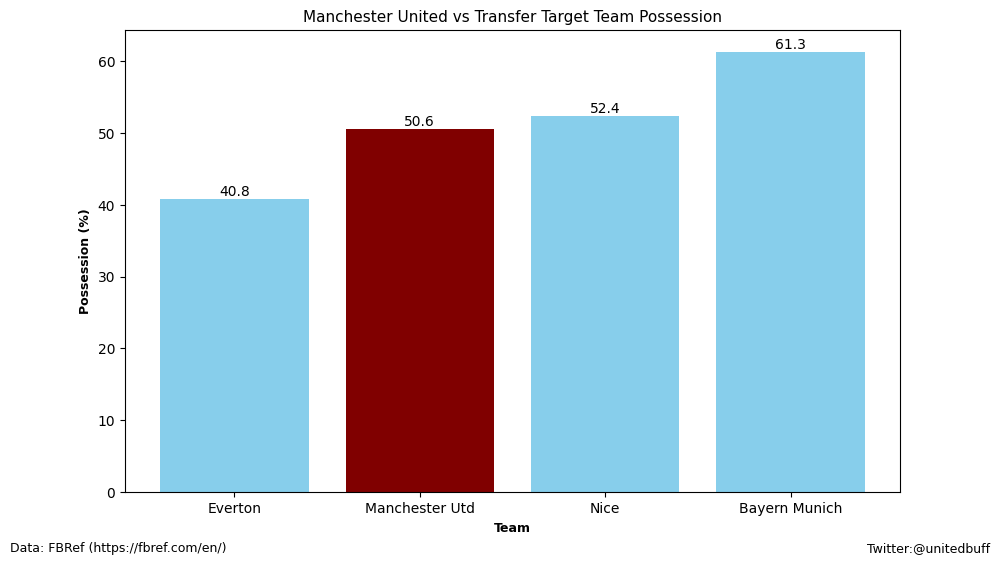

In [15]:
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['skyblue' if team != 'Manchester Utd' else 'maroon' for team in possession_team.squad]
plt.bar(possession_team.squad, possession_team.possession, color=colors)
plt.xlabel('Team',fontdict={'size':9,'fontweight':'bold','color':'black'})
plt.ylabel('Possession (%)',fontdict={'size':9,'fontweight':'bold','color':'black'})
plt.title('Manchester United vs Transfer Target Team Possession',fontdict={'size':11,'color':'black'})

# Annotate each bar with possession values
for index, value in enumerate(possession_team.possession):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center')

plt.figtext(0.01, 0.01, 'Data: FBRef (https://fbref.com/en/)', ha='left', fontdict={'size':9,'color':'black'})
plt.figtext(0.99, 0.01, 'Twitter:@unitedbuff', ha='right', fontdict={'size':9,'color':'black'})
#ax.text(-.03, -.17, 'Data: FBRef (https://fbref.com/en/)', ha='left', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
#ax.text(.99, -.17, 'Twitter:@unitedbuff', ha='right', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})

plt.show()

In [138]:
possession_team_prem = all_data.loc[all_data.league_name=='Premier-League']
possession_team_prem = possession_team_prem[['squad','possession']].sort_values('possession').reset_index(drop=True)
possession_team_prem

,squad,possession
0,Sheffield Utd,35.8
1,Nott'ham Forest,40.6
2,Everton,40.8
3,West Ham,41.1
4,Crystal Palace,42.3
5,Luton Town,42.4
6,Bournemouth,44.4
7,Brentford,45.2
8,Burnley,47.4
9,Wolves,48.9


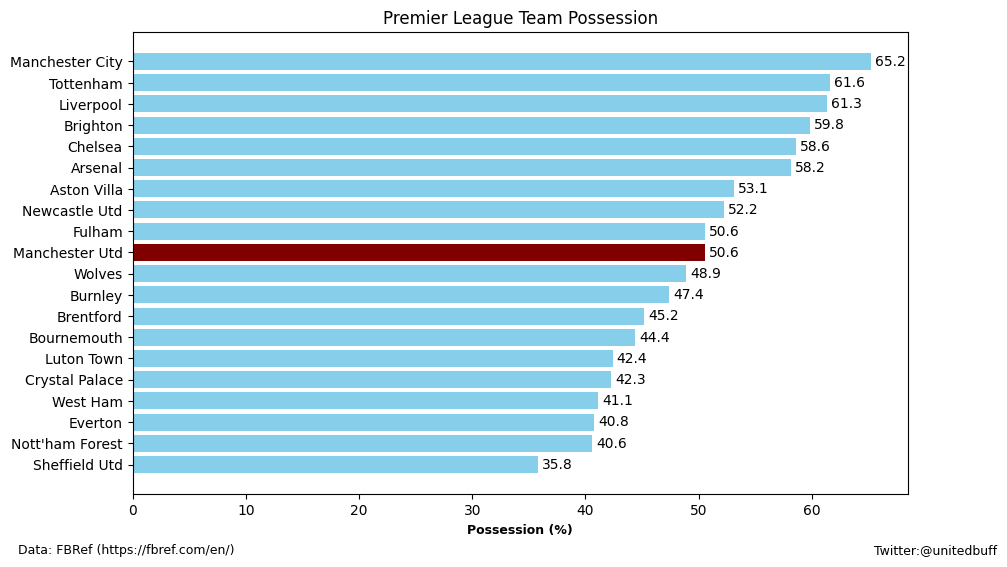

In [170]:
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt

colors = ['skyblue' if team != 'Manchester Utd' else 'maroon' for team in possession_team_prem.squad]
plt.figure(figsize=(10, 6))
plt.barh(possession_team_prem.squad, possession_team_prem.possession, color=colors)
plt.xlabel('Possession (%)',fontdict={'size':9,'fontweight':'bold','color':'black'})
plt.title('Premier League Team Possession')

# Annotate each bar with possession values
for index, value in enumerate(possession_team_prem.possession):
    plt.text(value+0.35, index, f'{value:.1f}', va='center')

plt.figtext(0.01, 0.01, 'Data: FBRef (https://fbref.com/en/)', ha='left', fontsize=9)
plt.figtext(0.99, 0.01, 'Twitter:@unitedbuff', ha='right', fontsize=9)
#ax.text(-.03, -.17, 'Data: FBRef (https://fbref.com/en/)', ha='left', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
#ax.text(.99, -.17, 'Twitter:@unitedbuff', ha='right', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})

plt.show()

In [176]:
prem = all_data.loc[all_data.league_name=='Premier-League']
prem = prem[['squad','possession','on_xg_for','on_xg_against','xg_plus_minus']].sort_values('xg_plus_minus').reset_index(drop=True)
prem

,squad,possession,on_xg_for,on_xg_against,xg_plus_minus
0,Sheffield Utd,35.8,38.3,76.7,-38.4
1,Luton Town,42.4,42.4,78.0,-35.5
2,Burnley,47.4,40.6,70.4,-29.7
3,Wolves,48.9,46.7,67.7,-21.0
4,West Ham,41.1,52.3,71.1,-18.8
5,Manchester Utd,50.6,56.5,68.9,-12.5
6,Fulham,50.6,50.8,62.9,-12.1
7,Crystal Palace,42.3,48.6,52.0,-3.4
8,Nott'ham Forest,40.6,49.9,53.2,-3.3
9,Bournemouth,44.4,55.9,58.1,-2.2


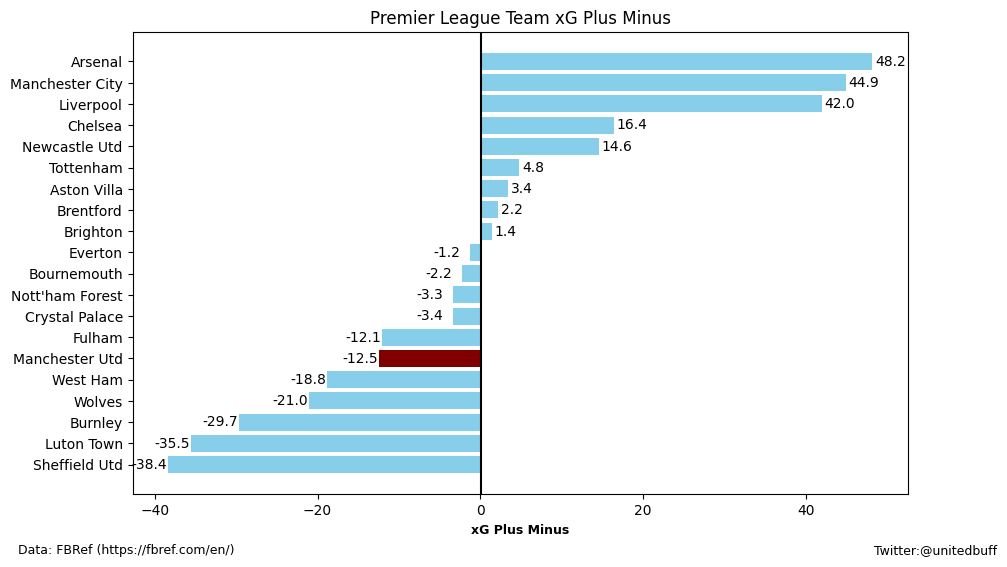

In [232]:
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt

colors = ['skyblue' if team != 'Manchester Utd' else 'maroon' for team in prem.squad]
plt.figure(figsize=(10, 6))
plt.barh(prem.squad, prem.xg_plus_minus, color=colors)
plt.xlabel('xG Plus Minus',fontdict={'size':9,'fontweight':'bold','color':'black'})
plt.title('Premier League Team xG Plus Minus')

# Annotate each bar with possession values
for index, value in enumerate(prem.xg_plus_minus):
    if value>0:
        plt.text(value+0.35, index, f'{value:.1f}', va='center')
    else:
        plt.text(value-4.5, index, f'{value:.1f}', va='center')
plt.axvline(x=1.068 / 2 - 0.5, color='black', linestyle='-')
plt.figtext(0.01, 0.01, 'Data: FBRef (https://fbref.com/en/)', ha='left', fontsize=9)
plt.figtext(0.99, 0.01, 'Twitter:@unitedbuff', ha='right', fontsize=9)
#ax.text(-.03, -.17, 'Data: FBRef (https://fbref.com/en/)', ha='left', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
#ax.text(.99, -.17, 'Twitter:@unitedbuff', ha='right', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})

plt.show()

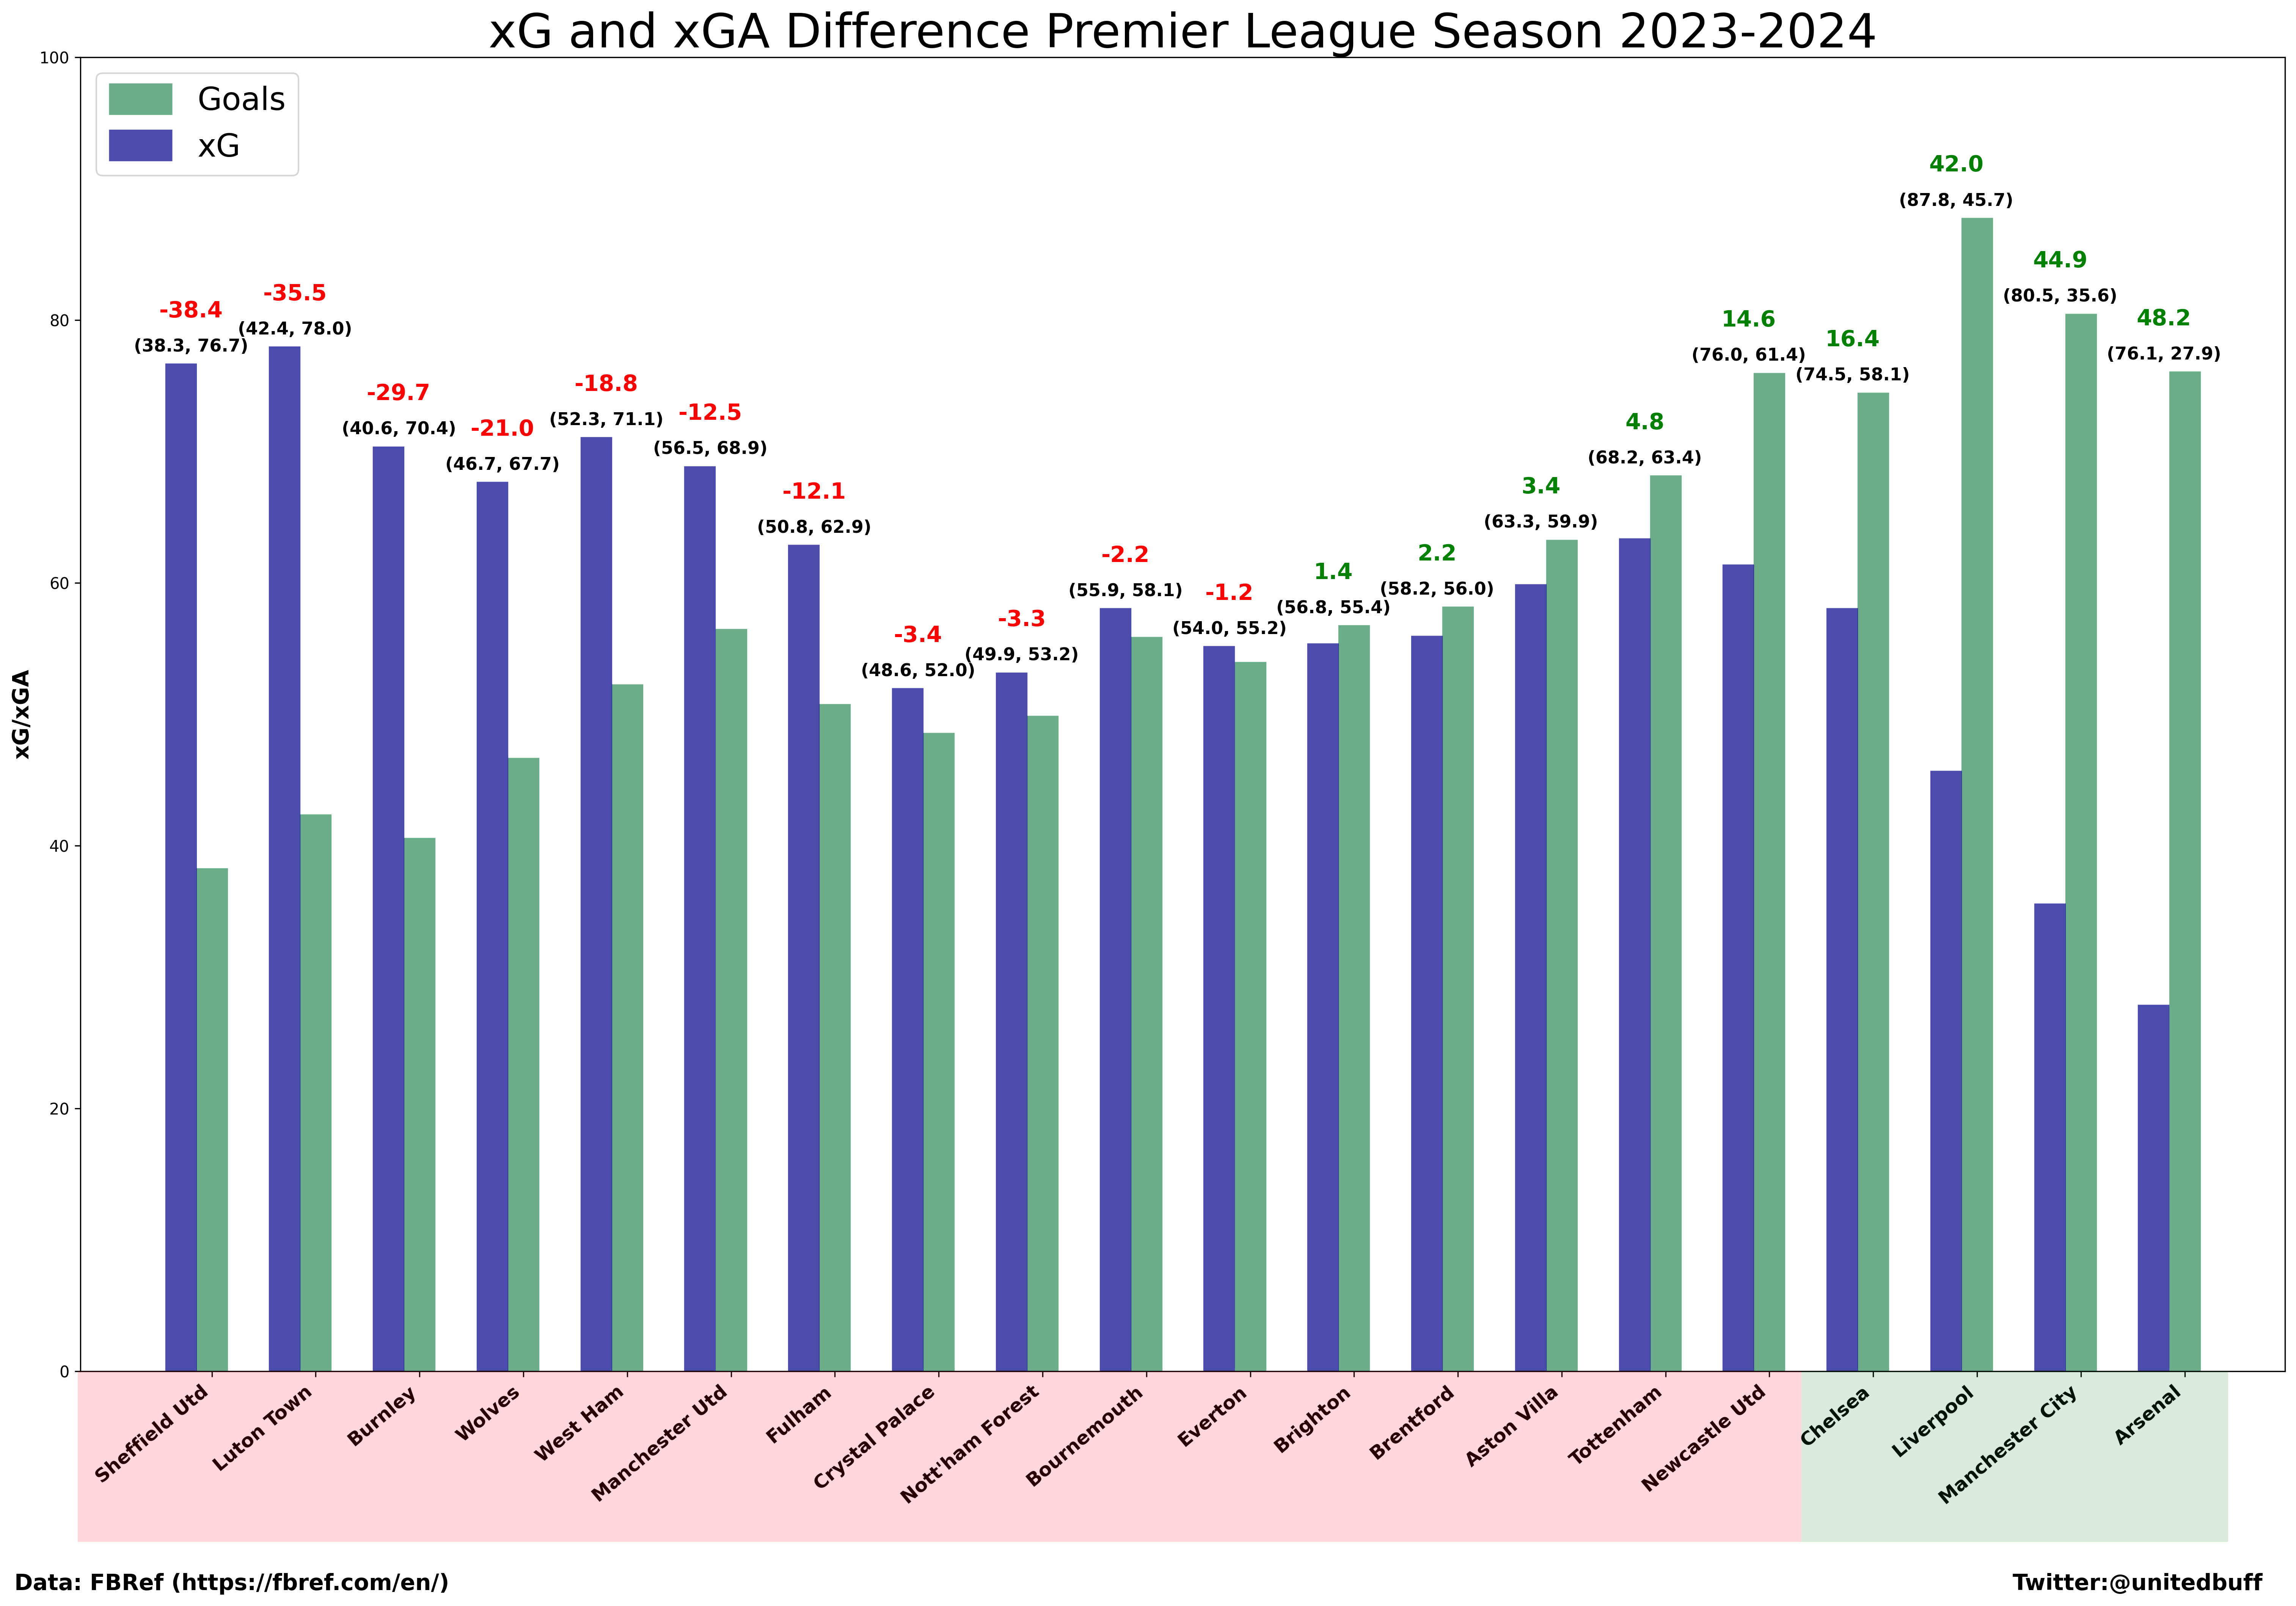

In [183]:
# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(25,15), facecolor='white', dpi= 300)

x=prem.index
w = 0.3
ax.vlines(x=x, ymin=0, ymax=prem.on_xg_for, color='seagreen', alpha=0.7, linewidth=20,label="Goals")
ax.vlines(x=x-w, ymin=0, ymax=prem.on_xg_against, color='darkblue', alpha=0.7, linewidth=20,label="xG")
#ax.bar(x-w,viz_dat.xG,width=w,color='green',align='center')
#ax.bar(x,viz_dat.Gls,width=w,color='firebrick',align='center')
ax.legend(loc="upper left",fontsize="20")

# Annotate Text
for i, a in enumerate(prem.on_xg_against):
    if a>prem['on_xg_for'][i]:
        ax.text(i-0.2, a+3.5, round(prem['xg_plus_minus'][i],1), horizontalalignment='center', fontdict={'size':14,'fontweight':'bold','color':'red'})
        ax.text(i-0.2, a+0.9, (prem['on_xg_for'][i],prem['on_xg_against'][i]), horizontalalignment='center',fontdict={'size':11,'fontweight':'bold'})
    else:
        ax.text(i-0.2, prem['on_xg_for'][i]+3.5, round(prem['xg_plus_minus'][i],1), horizontalalignment='center',fontdict={'size':14,'fontweight':'bold','color':'green'})
        ax.text(i-0.2, prem['on_xg_for'][i]+0.9, (prem['on_xg_for'][i],prem['on_xg_against'][i]), horizontalalignment='center',fontdict={'size':11,'fontweight':'bold'})

# Title, Label, Ticks and Ylim
ax.set_title('xG and xGA Difference Premier League Season 2023-2024', fontdict={'size':30})
ax.set(ylim=(0,100))
ax.set_ylabel('xG/xGA',fontsize=14,fontweight='bold')
plt.xticks(prem.index, prem.squad, rotation=40, horizontalalignment='right', fontsize=12,fontweight='bold')
ax.text(-.03, -.17, 'Data: FBRef (https://fbref.com/en/)', ha='left', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
ax.text(.99, -.17, 'Twitter:@unitedbuff', ha='right', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
# Add patches to color the X axis labels
p1 = patches.Rectangle((.73, 0.01), width=.15, height=.10, alpha=.15, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, 0.01), width=.606, height=.10, alpha=.15, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
#plt.grid()
plt.show()

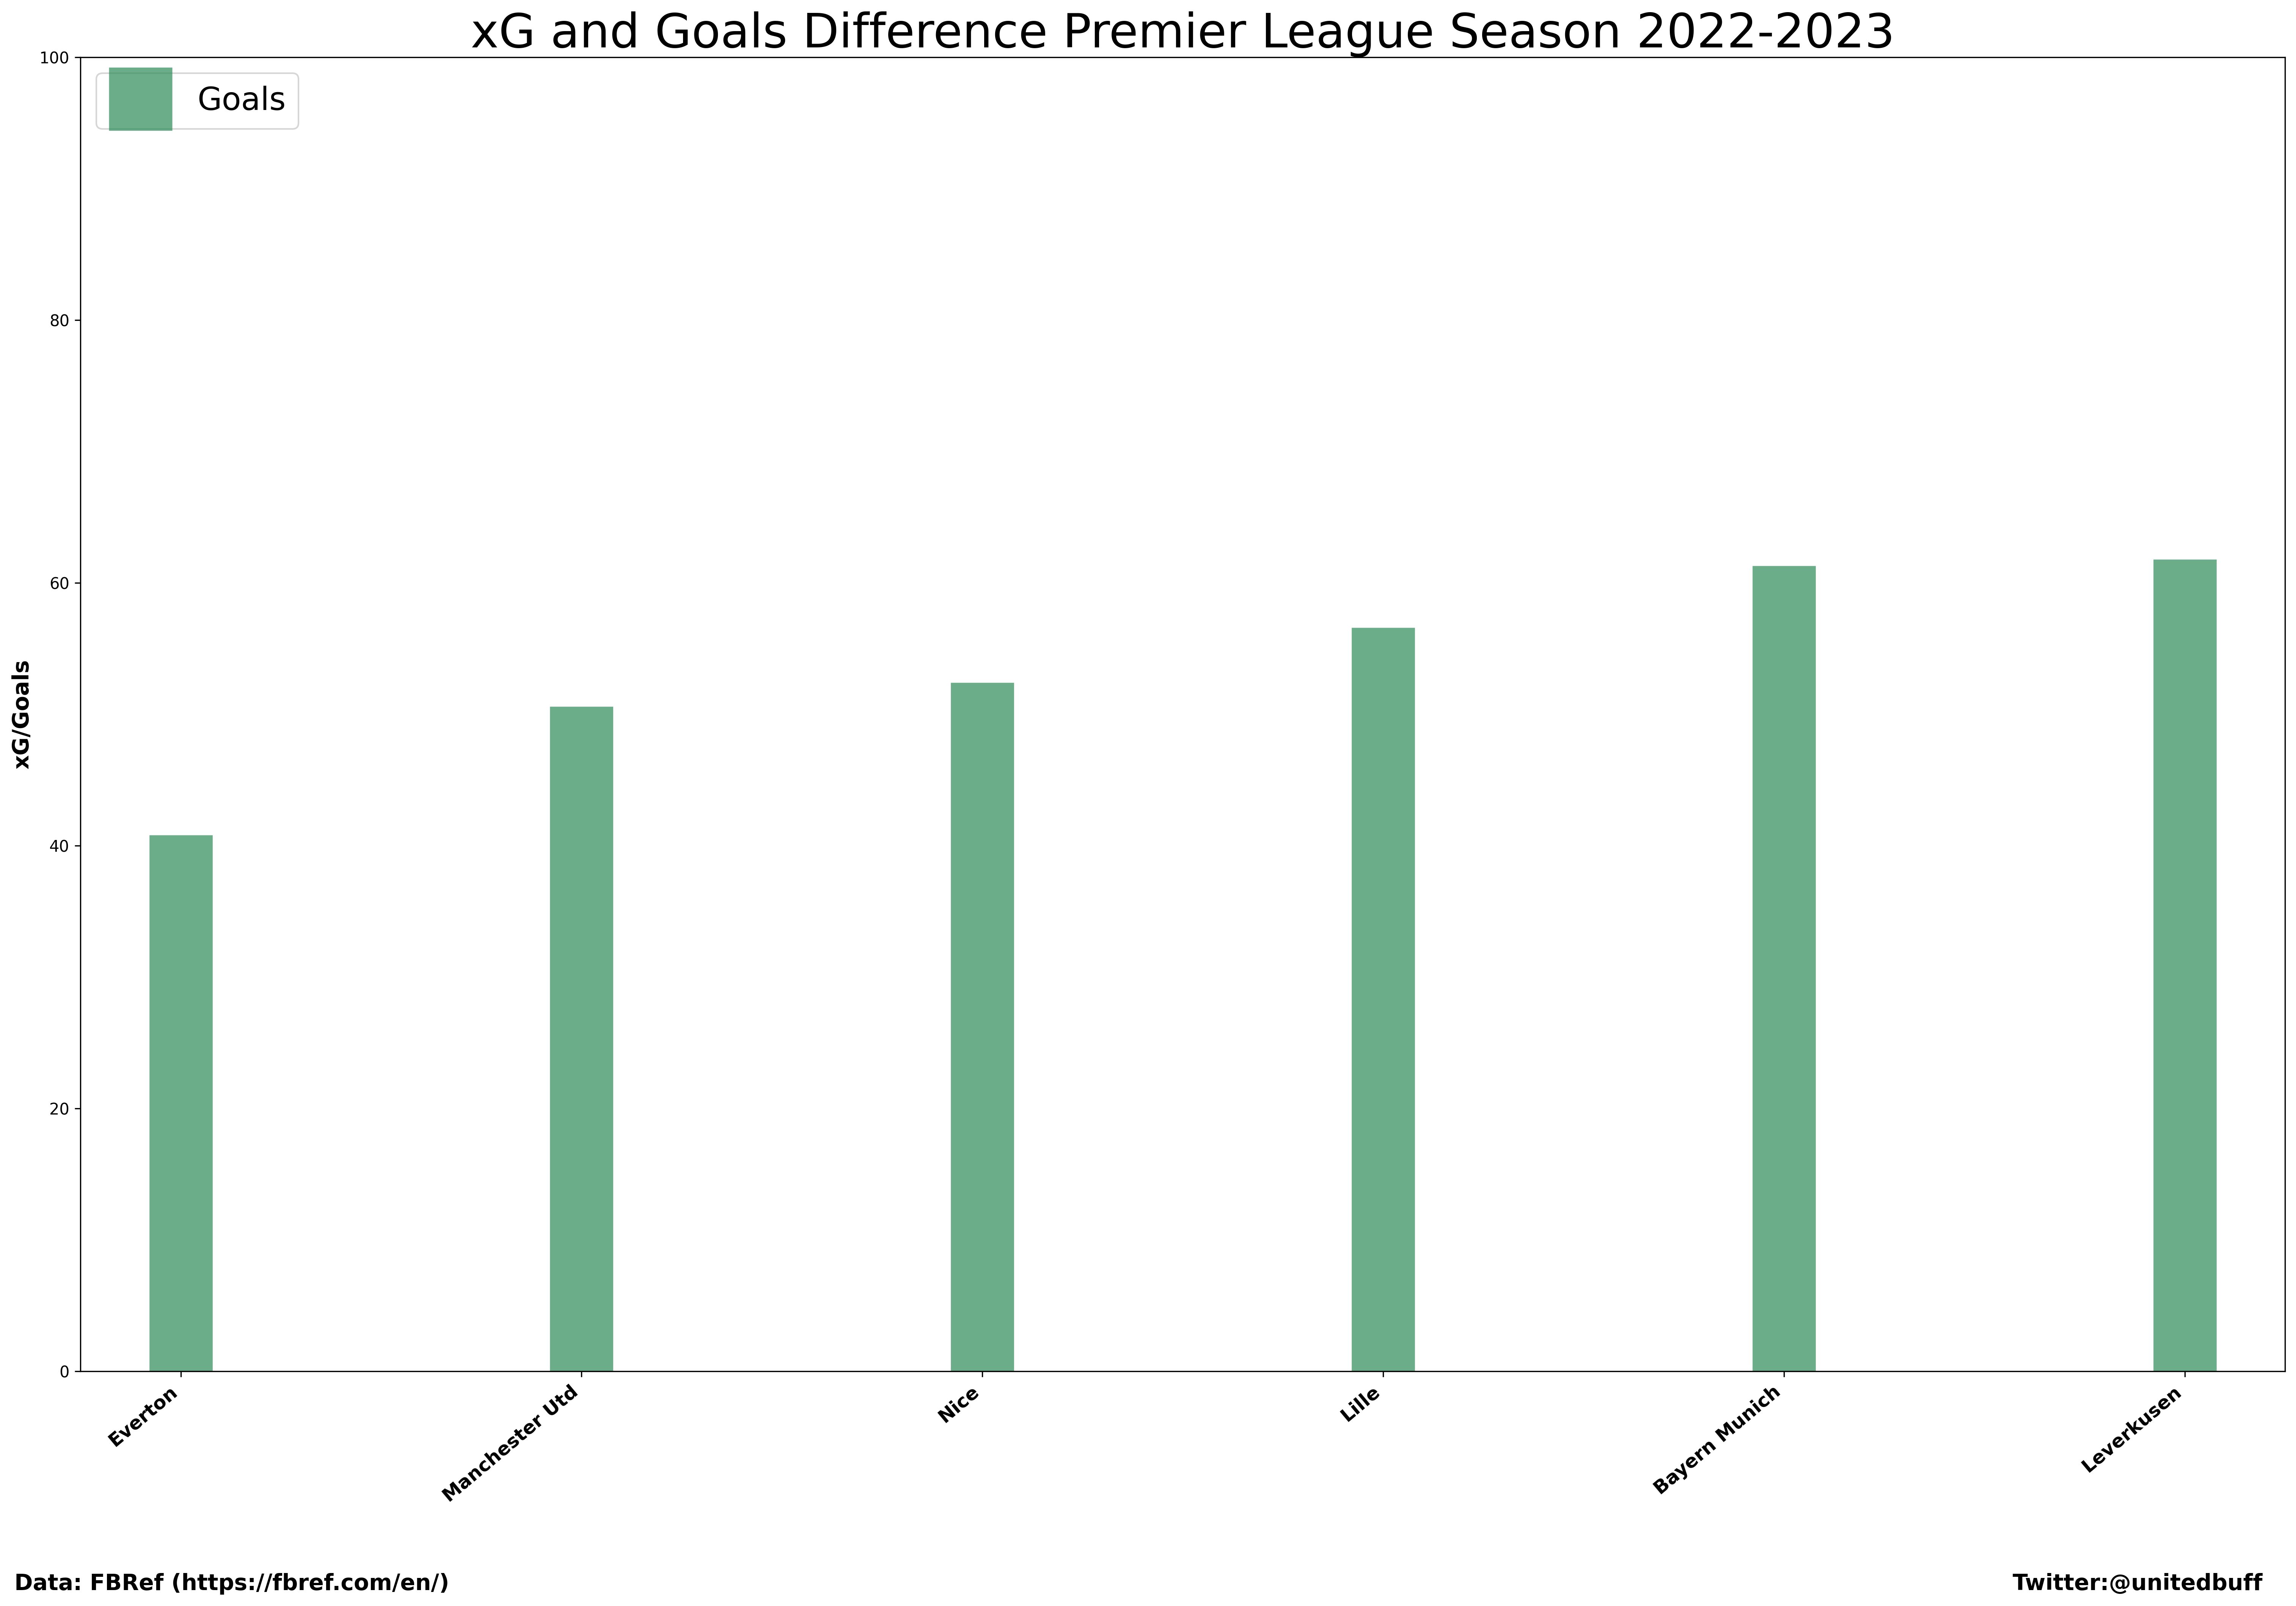

In [117]:
# Draw plot
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,15), facecolor='white', dpi= 300)

x=possession_team.index
w = 0.3
ax.vlines(x=x, ymin=0, ymax=possession_team.possession, color='seagreen', alpha=0.7, linewidth=40,label="Goals")
#ax.vlines(x=x-w, ymin=0, ymax=viz_dat.xG, color='darkblue', alpha=0.7, linewidth=20,label="xG")
#ax.bar(x-w,viz_dat.xG,width=w,color='green',align='center')
#ax.bar(x,viz_dat.Gls,width=w,color='firebrick',align='center')
ax.legend(loc="upper left",fontsize="20")

# Annotate Text
#for i, a in enumerate(possession_team.possession):
    #if a>viz_dat['xG'][i]:
    #ax.text(i, a, round(possession_team['possession'][i],1), horizontalalignment='center', fontdict={'size':14,'fontweight':'bold','color':'green'})
    #ax.text(i-0.2, a+0.9, (possession_team['xG'][i],viz_dat['Gls'][i]), horizontalalignment='center',fontdict={'size':11,'fontweight':'bold'})
    #else:
    #    ax.text(i-0.2, viz_dat['xG'][i]+3.5, round(viz_dat['G-xG'][i],1), horizontalalignment='center',fontdict={'size':14,'fontweight':'bold','color':'red'})
    #    ax.text(i-0.2, viz_dat['xG'][i]+0.9, (viz_dat['xG'][i],viz_dat['Gls'][i]), horizontalalignment='center',fontdict={'size':11,'fontweight':'bold'})

# Title, Label, Ticks and Ylim
ax.set_title('xG and Goals Difference Premier League Season 2022-2023', fontdict={'size':30})
ax.set(ylim=(0,100))
ax.set_ylabel('xG/Goals',fontsize=14,fontweight='bold')
plt.xticks(possession_team.index, possession_team.squad, rotation=40, horizontalalignment='right', fontsize=12,fontweight='bold')
ax.text(-.03, -.17, 'Data: FBRef (https://fbref.com/en/)', ha='left', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
ax.text(.99, -.17, 'Twitter:@unitedbuff', ha='right', va='bottom', transform=ax.transAxes,fontdict={'size':14,'fontweight':'bold','color':'black'})
# Add patches to color the X axis labels
#p1 = patches.Rectangle((.73, 0.01), width=.15, height=.10, alpha=.15, facecolor='green', transform=fig.transFigure)
#p2 = patches.Rectangle((.124, 0.01), width=.606, height=.10, alpha=.15, facecolor='red', transform=fig.transFigure)
#fig.add_artist(p1)
#fig.add_artist(p2)
#plt.grid()
plt.show()

In [84]:
mu = all_df.loc[all_df.player.isin(list_player_mu)]
mu

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_defense,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
176,Jonny Evans,nir NIR,DF,DF,35,1988,23.0,15.0,1392.0,0.0,1.0,0.0,0.0,2.0,0.0,0.00,0.06,0.06,0.00,0.06,0.1,0.1,0.1,0.00,0.00,0.00,0.00,0.00,15.5,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.06,-0.1,-0.1,729.0,832.0,87.6,11952.0,3843.0,323.0,350.0,92.3,344.0,374.0,92.0,40.0,72.0,55.6,1.0,6.0,29.0,3.0,0.0,37.0,778.0,51.0,18.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,7.0,11.0,0.71,11.0,0.0,0.0,0.0,0.0,2.0,0.13,2.0,0.0,0.0,0.0,0.0,0.0,22.0,14.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,18.0,18.0,7.0,23.0,76.0,0.0,1005.0,185.0,556.0,420.0,31.0,8.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,567.0,567.0,567.0,7.0,5.0,0.0,0.0,625.0,625.0,5.0,3.0,0.0,17.0,13.0,0.0,0.0,0.0,0.0,70.0,36.0,18.0,66.7
306,Victor Lindelöf,se SWE,DF,DF,29,1994,19.0,14.0,1328.0,1.0,1.0,0.0,0.0,2.0,0.0,0.07,0.07,0.14,0.07,0.14,0.8,0.8,0.8,0.05,0.05,0.05,0.05,0.05,14.8,0.0,4.0,0.0,66.7,66.7,0.27,0.17,0.25,0.13,0.2,0.2,826.0,927.0,89.1,13195.0,3696.0,398.0,435.0,91.5,355.0,385.0,92.2,48.0,70.0,68.6,1.0,8.0,62.0,3.0,0.0,40.0,854.0,73.0,8.0,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,7.0,19.0,1.29,19.0,0.0,0.0,0.0,0.0,3.0,0.20,3.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,9.0,9.0,9.0,12.0,40.0,1.0,1037.0,102.0,466.0,463.0,114.0,15.0,1037.0,1037.0,1037.0,1037.0,1037.0,1037.0,620.0,620.0,620.0,17.0,14.0,0.0,0.0,706.0,706.0,5.0,3.0,0.0,15.0,2.0,3.0,0.0,0.0,0.0,75.0,17.0,24.0,41.5
319,Harry Maguire,eng ENG,DF,DF,30,1993,22.0,18.0,1653.0,2.0,2.0,0.0,0.0,4.0,0.0,0.11,0.11,0.22,0.11,0.22,2.0,2.0,2.0,0.11,0.11,0.11,0.11,0.11,18.4,0.0,3.0,0.0,15.0,15.0,0.16,0.10,0.67,0.10,0.0,0.0,917.0,1103.0,83.1,16999.0,6419.0,382.0,423.0,90.3,412.0,472.0,87.3,102.0,176.0,58.0,2.0,6.0,78.0,6.0,0.0,73.0,1018.0,83.0,36.0,0.0,0.0,13

In [ ]:
mu['player','minutes','passes_completed','passes','']

In [63]:
mu.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 176 to 538
Data columns (total 154 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    player                       object 
 1    nationality                  object 
 2    position                     object 
 3    squad                        object 
 4    age                          int64  
 5    birth_year                   int64  
 6    games                        float64
 7    games_starts                 float64
 8    minutes                      float64
 9    goals                        float64
 10   assists                      float64
 11   pens_made                    float64
 12   pens_att                     float64
 13   cards_yellow                 float64
 14   cards_red                    float64
 15   goals_per90                  float64
 16   assists_per90                float64
 17   goals_assists_per90          float64
 18   goals_pens_per90             floa

In [61]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [ ]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(bruno_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#cc2a3f')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#cc2a3f')

fig.set_facecolor('#121212')